# Problem Statement

1. How to optimize the social ad campaigns for the highest conversion rate possible? (Attain best Reach to Conversion ratios/Click to Conversion ratios)


2. Finding the perfect target demographics with the appropriate click through rates


3. Understanding the ideal turnaround/decision making time per age group to convert and re-target future social campaigns

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
# Reading CSV file 
df = pd.read_csv("KAG_conversion_data.csv")
df

,ad_id,xyz_campaign_id,fb_campaign_id,age,gender,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion
0,708746,916,103916,30-34,M,15,7350,1,1.430000,2,1
1,708749,916,103917,30-34,M,16,17861,2,1.820000,2,0
2,708771,916,103920,30-34,M,20,693,0,0.000000,1,0
3,708815,916,103928,30-34,M,28,4259,1,1.250000,1,0
4,708818,916,103928,30-34,M,28,4133,1,1.290000,1,1
...,...,...,...,...,...,...,...,...,...,...,...
1138,1314410,1178,179977,45-49,F,109,1129773,252,358.189997,13,2
1139,1314411,1178,179978,45-49,F,110,637549,120,173.880003,3,0
1140,1314412,1178,179979,45-49,F,111,151531,28,40.289999,2,0
1141,1314414,1178,179981,45-49,F,113,790253,135,198.710000,8,2


In [8]:
# Printing first five row of the dataset
df.head()

,ad_id,xyz_campaign_id,fb_campaign_id,age,gender,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion
0,708746,916,103916,30-34,M,15,7350,1,1.43,2,1
1,708749,916,103917,30-34,M,16,17861,2,1.82,2,0
2,708771,916,103920,30-34,M,20,693,0,0.00,1,0
3,708815,916,103928,30-34,M,28,4259,1,1.25,1,0
4,708818,916,103928,30-34,M,28,4133,1,1.29,1,1


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ad_id                1143 non-null   int64  
 1   xyz_campaign_id      1143 non-null   int64  
 2   fb_campaign_id       1143 non-null   int64  
 3   age                  1143 non-null   object 
 4   gender               1143 non-null   object 
 5   interest             1143 non-null   int64  
 6   Impressions          1143 non-null   int64  
 7   Clicks               1143 non-null   int64  
 8   Spent                1143 non-null   float64
 9   Total_Conversion     1143 non-null   int64  
 10  Approved_Conversion  1143 non-null   int64  
dtypes: float64(1), int64(8), object(2)
memory usage: 98.4+ KB


It shows column name, number of data in each column along with thier data type. It also shows the count of non-null values

In [10]:
df.describe()

,ad_id,xyz_campaign_id,fb_campaign_id,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion
count,1.143000e+03,1143.000000,1143.000000,1143.000000,1.143000e+03,1143.000000,1143.000000,1143.000000,1143.000000
mean,9.872611e+05,1067.382327,133783.989501,32.766404,1.867321e+05,33.390201,51.360656,2.855643,0.944007
std,1.939928e+05,121.629393,20500.308622,26.952131,3.127622e+05,56.892438,86.908418,4.483593,1.737708
min,7.087460e+05,916.000000,103916.000000,2.000000,8.700000e+01,0.000000,0.000000,0.000000,0.000000
25%,7.776325e+05,936.000000,115716.000000,16.000000,6.503500e+03,1.000000,1.480000,1.000000,0.000000
50%,1.121185e+06,1178.000000,144549.000000,25.000000,5.150900e+04,8.000000,12.370000,1.000000,1.000000
75%,1.121804e+06,1178.000000,144657.500000,31.000000,2.217690e+05,37.500000,60.025000,3.000000,1.000000
max,1.314415e+06,1178.000000,179982.000000,114.000000,3.052003e+06,421.000000,639.949998,60.000000,21.000000


Descriptive statistics include those that summarize the central tendency, dispersion and shape of a dataset’s distribution, excluding NaN values.

Count: Tell the number of rows in the data set mean: Mean of the values in that column std: Standared deviation of values in that column min and max: Minimum and maximum value of that column 25%, 50% and 70% : This value show the 25th, 50th, and 75th percentiles.

In [11]:
data = df[['xyz_campaign_id', 'Spent']]
data.head()

,xyz_campaign_id,Spent
0,916,1.43
1,916,1.82
2,916,0.00
3,916,1.25
4,916,1.29


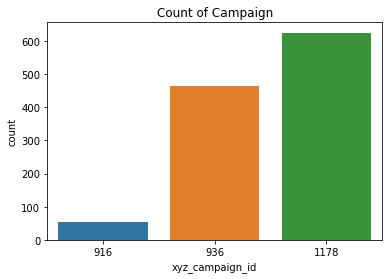

In [12]:
sns.countplot(x="xyz_campaign_id",data = df).set_title("Count of Campaign")
plt.show()

Above graph show which add campaign was done most of the time. Campaign_id 1178 was done maximum number of time as compared to other

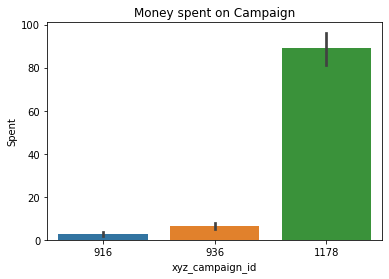

In [14]:
sns.barplot(x="xyz_campaign_id",y= "Spent",data = df).set_title("Money spent on Campaign")
plt.show()

Money spent on camapaign with campaign id 1178 is almost 4 times of the other two campaign.

<AxesSubplot:>

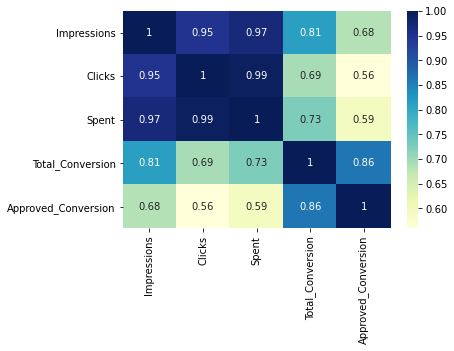

In [15]:
sns.heatmap(df[["Impressions","Clicks","Spent","Total_Conversion","Approved_Conversion"]].corr(),annot=True,cmap="YlGnBu")

From the above heatmap, we can see that the correlation value for impression and total conversion is high as comapared to corrrelation between impression and approved conversion. Through this we can interpret that when the ad is shown multiple time to the people they check that out for sure.

<AxesSubplot:xlabel='age', ylabel='Clicks'>

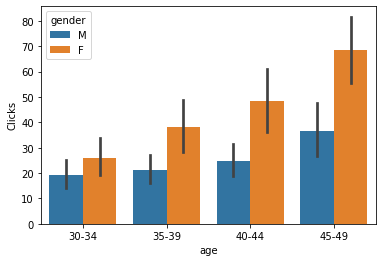

In [16]:
sns.barplot(x="age",y="Clicks", data = df, hue= "gender")

The graph show that age group 45-49 has clicked on ad maximum number of time as compared to other age group people. Females of the group has clicked more time on ads in capmarison with males.

<AxesSubplot:xlabel='age', ylabel='Clicks'>

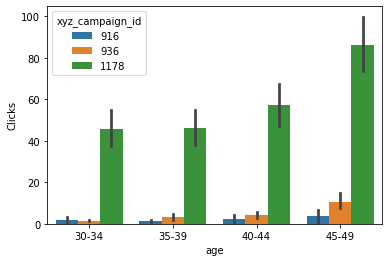

In [17]:
sns.barplot(x="age",y="Clicks", data = df, hue = "xyz_campaign_id")

This graph tell that in all the age group ads which campaign id 1178 was clicked most of the time as compared to other.

<AxesSubplot:xlabel='xyz_campaign_id', ylabel='Approved_Conversion'>

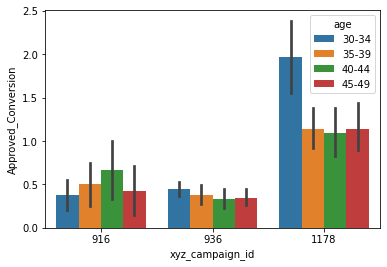

In [18]:
sns.barplot(x="xyz_campaign_id", y = "Approved_Conversion", hue= "age", data = df)

As we have seen earlier that in campaign id 1178 maximum click was being done with people of age group 45-49. But in the above graph we can see that maximum approved conversion are being made by people of age group 30-34, which has made less number of click as comapred to all the other age group.

So, ads with campaign id 1178 can target people of age group 30-34, whereas 936 can target mostly on age group 30-34 as well. Campaign id 916 can target people of age group 40-44 as they purchase more number of time.

<AxesSubplot:xlabel='age', ylabel='Spent'>

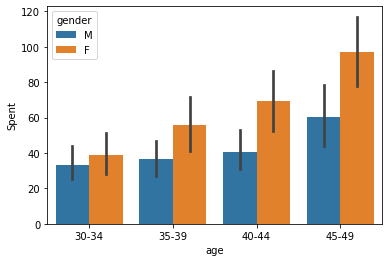

In [19]:
sns.barplot(x="age", y="Spent", hue= "gender",data = df)  

Company have spent more on female as compared to male of all the age group.

<AxesSubplot:xlabel='xyz_campaign_id', ylabel='Approved_Conversion'>

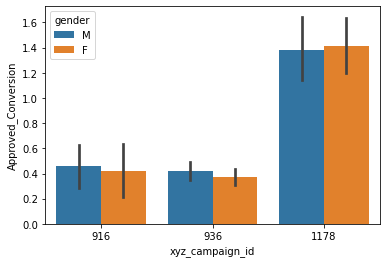

In [20]:
sns.barplot(x="xyz_campaign_id", y = "Approved_Conversion", hue= "gender", data = df)

This graph tell us that approved conversion has been made by both male and female equally. But comapnies have spent more on female.

# Conclusion

# 1.) How to optimize the social ad campaigns for the highest conversion rate possible? (Attain best Reach to Conversion ratios/Click to Conversion ratios)

Thus we can use data's features to increase the conversion rate

# 2.)Finding the perfect target demographics with the appropriate clickthrough rates.

The target group of people who has higher click-through rates are females under the age group of 45-49.

# 3.)Understanding the ideal turnaround/decision making time per age group to convert and retarget future social campaigns

Age Group 30-34: This age group has lesser percentage of click through rates but they have higher ratio in buying the product and doing enquiry about the product. Hence, they are risk takers who sees the ad clicks and most of the time takes the product.
    
    
    Age group 45-49: This age group clicks on ad more no. of times but don't buy the product or enquire frequently.
        
        
        Thus the company can target on age group 30-34

# 4.)Comparing the individual campaign performance so the best creative/campaign can be run again with adjusted audiences.

Company 1s campaigns can be used as better click through rates!